In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
path = '../Resources/'
df = pd.read_csv(path + 'cleaned_player.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df

,date,player_name,team,opponent,player_id,match_id,event_id,best_of,map,kills,...,kddiff,adr,fkdiff,rating,result,map_winner,starting_ct,ct,t,match_winner
0,2020-02-26,EliGE,Liquid,Evil Geniuses,8738,2339385,4901,3,Overpass,15.0,...,3.0,77.0,3.0,1.32,16,W,No,7,9,Yes
1,2020-02-26,NAF,Liquid,Evil Geniuses,8520,2339385,4901,3,Overpass,10.0,...,-2.0,51.5,0.0,0.83,16,W,No,7,9,Yes
2,2020-02-26,Stewie2K,Liquid,Evil Geniuses,8797,2339385,4901,3,Overpass,18.0,...,7.0,76.2,3.0,1.40,16,W,No,7,9,Yes
3,2020-02-26,Twistzz,Liquid,Evil Geniuses,10394,2339385,4901,3,Overpass,24.0,...,14.0,106.4,1.0,1.58,16,W,No,7,9,Yes
4,2020-02-26,nitr0,Liquid,Evil Geniuses,7687,2339385,4901,3,Overpass,15.0,...,3.0,69.0,2.0,1.23,16,W,No,7,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93094,2018-01-07,Edward,Natus Vincere,Space Soldiers,483,2318402,3359,3,Train,10.0,...,-10.0,64.2,-1.0,0.72,16,W,Yes,8,8,Yes
93095,2018-01-07,Zeus,Natus Vincere,Space Soldiers,484,2318402,3359,3,Train,15.0,...,0.0,67.1,-3.0,1.03,16,W,Yes,8,8,Yes
93096,2018-01-07,electronic,Natus Vincere,Space Soldiers,8918,2318402,3359,3,Train,22.0,...,8.0,93.4,2.0,1.35,16,W,Yes,8,8,Yes
93097,2018-01-07,flamie,Natus Vincere,Space Soldiers,7594,2318402,3359,3,Train,22.0,...,6.0,94.4,4.0,1.43,16,W,Yes,8,8,Yes


In [5]:
encoded_df = df.copy()
encoded_df.head(11)

,date,player_name,team,opponent,player_id,match_id,event_id,best_of,map,kills,...,kddiff,adr,fkdiff,rating,result,map_winner,starting_ct,ct,t,match_winner
0,2020-02-26,EliGE,Liquid,Evil Geniuses,8738,2339385,4901,3,Overpass,15.0,...,3.0,77.0,3.0,1.32,16,W,No,7,9,Yes
1,2020-02-26,NAF,Liquid,Evil Geniuses,8520,2339385,4901,3,Overpass,10.0,...,-2.0,51.5,0.0,0.83,16,W,No,7,9,Yes
2,2020-02-26,Stewie2K,Liquid,Evil Geniuses,8797,2339385,4901,3,Overpass,18.0,...,7.0,76.2,3.0,1.40,16,W,No,7,9,Yes
3,2020-02-26,Twistzz,Liquid,Evil Geniuses,10394,2339385,4901,3,Overpass,24.0,...,14.0,106.4,1.0,1.58,16,W,No,7,9,Yes
4,2020-02-26,nitr0,Liquid,Evil Geniuses,7687,2339385,4901,3,Overpass,15.0,...,3.0,69.0,2.0,1.23,16,W,No,7,9,Yes
5,2020-02-26,ALEX,Vitality,FaZe,8184,2339391,4901,3,Mirage,22.0,...,2.0,68.7,0.0,0.98,16,W,Yes,7,9,No
6,2020-02-26,RpK,Vitality,FaZe,7169,2339391,4901,3,Mirage,11.0,...,-10.0,56.8,-3.0,0.77,16,W,Yes,7,9,No
7,2020-02-26,ZywOo,Vitality,FaZe,11893,2339391,4901,3,Mirage,32.0,...,16.0,120.1,5.0,1.84,16,W,Yes,7,9,No
8,2020-02-26,apEX,Vitality,FaZe,7322,2339391,4901,3,Mirage,13.0,...,-9.0,59.7,-4.0,0.75,16,W,Yes,7,9,No
9,2020-02-26,shox,Vitality,FaZe,1225,2339391,4901,3,Mirage,20.0,...,2.0,62.7,0.0,1.05,16,W,Yes,7,9,No


In [6]:
lb_make = LabelEncoder()
encoded_df['team'] = lb_make.fit_transform(encoded_df['team'])
encoded_df['opponent'] = lb_make.fit_transform(encoded_df['opponent'])
encoded_df['map'] = lb_make.fit_transform(encoded_df['map'])
encoded_df['starting_ct'] = lb_make.fit_transform(encoded_df['starting_ct'])
encoded_df['map_winner'] = lb_make.fit_transform(encoded_df['map_winner'])
encoded_df['match_winner'] = lb_make.fit_transform(encoded_df['match_winner'])
encoded_df['player_name'] = lb_make.fit_transform(encoded_df['player_name'])
encoded_df[['player_name','team','opponent','map','map_winner','starting_ct', 'match_winner']].head(11)

,player_name,team,opponent,map,map_winner,starting_ct,match_winner
0,34,20,132,7,1,0,1
1,97,20,132,7,1,0,1
2,140,20,132,7,1,0,1
3,150,20,132,7,1,0,1
4,274,20,132,7,1,0,1
5,1,43,144,5,1,1,0
6,118,43,144,5,1,1,0
7,162,43,144,5,1,1,0
8,169,43,144,5,1,1,0
9,301,43,144,5,1,1,0


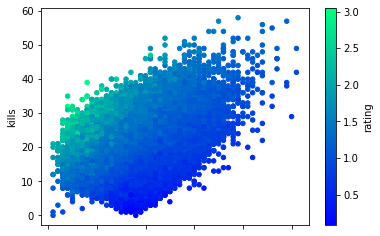

In [7]:
encoded_df.plot.scatter(x="deaths", y="kills", c="rating", colormap='winter')

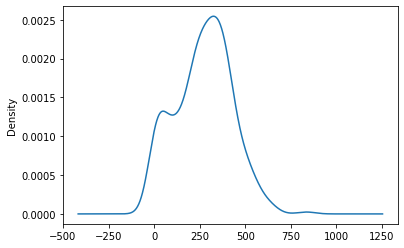

In [8]:
player_counts = encoded_df.player_name.value_counts()
player_counts.plot.density()

In [9]:
encoded_df.dtypes

date              object
player_name        int32
team               int32
opponent           int32
player_id          int64
match_id           int64
event_id           int64
best_of            int64
map                int32
kills            float64
assists          float64
deaths           float64
hs               float64
flash_assists    float64
kast             float64
kddiff           float64
adr              float64
fkdiff           float64
rating           float64
result             int64
map_winner         int32
starting_ct        int32
ct                 int64
t                  int64
match_winner       int32
dtype: object

In [10]:
encoded_df = encoded_df.dropna()

In [11]:
encoded_df.isnull().any()

date             False
player_name      False
team             False
opponent         False
player_id        False
match_id         False
event_id         False
best_of          False
map              False
kills            False
assists          False
deaths           False
hs               False
flash_assists    False
kast             False
kddiff           False
adr              False
fkdiff           False
rating           False
result           False
map_winner       False
starting_ct      False
ct               False
t                False
match_winner     False
dtype: bool

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
y = encoded_df['map_winner'].values
X = encoded_df.drop(['map_winner','date','event_id','match_id','player_id','team','opponent'],1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [13]:
len(X_train)

66066

In [14]:
len(X_test)

22023

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="liblinear",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Logistic regression model accuracy: 0.990


In [17]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [18]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 152       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
# fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])
fit_model = nn.fit(X_train_scaled,y_train,epochs=30)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 66066 samples
Epoch 1/30
66066/66066 [==============================] - 2s 32us/sample - loss: 0.2312 - accuracy: 0.9441
Epoch 2/30
66066/66066 [==============================] - 2s 27us/sample - loss: 0.0630 - accuracy: 0.9927
Epoch 3/30
66066/66066 [==============================] - 2s 26us/sample - loss: 0.0345 - accuracy: 0.9935
Epoch 4/30
66066/66066 [==============================] - 2s 26us/sample - loss: 0.0247 - accuracy: 0.9937
Epoch 5/30
66066/66066 [==============================] - 2s 26us/sample - loss: 0.0198 - accuracy: 0.9942
Epoch 6/30
66066/66066 [==============================] - 2s 27us/sample - loss: 0.0172 - accuracy: 0.9950
Epoch 7/30
66066/66066 [==============================] - 2s 27us/sample - loss: 0.0162 - accuracy: 0.9948
Epoch 8/30
66066/66066 [==============================] - 2s 27us/sample - loss: 0.0156 - accuracy: 0.9948
Epoch 9/30
66066/66066 [==============================] - 2s 26us/sample - loss: 0.0150 - accuracy: 0.9950
Epoch 10/30
66

In [22]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

22023/22023 - 0s - loss: 0.0103 - accuracy: 0.9958
Loss: 0.010294015833525894, Accuracy: 0.9957771301269531
